# MATH 210 Project 2
## Mathematic Modeling of a Mechanical Light Switch

Project members:

* William Kendrick: 725 875 12
* Alessandro Adami: 324 419 74
* Sean Donaghy: 935 919 23

## Model Equations and Parameters


where:

* $\theta$ is the angular position of the switch

### Setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [3]:
I = (5*10**(-7))
R = 5*10**(-2)
mu = 10**(-4)
k = 1
d = 5*10**(-3)
l0 = 0.025

### Model Equations
1. $l(\theta)$
2. $\tau(\theta)$

In [12]:
l = lambda theta: ((R*np.sin(theta))**2+(R*np.cos(theta) - (R+d))**2)**(1/2)
tau = lambda theta: (-k*(l(theta) - l0)*R*(R+d)*np.sin(theta))/(l(theta))

#### 1. Plot $\tau (\theta)$ for $\theta \in (-\pi, \pi) $

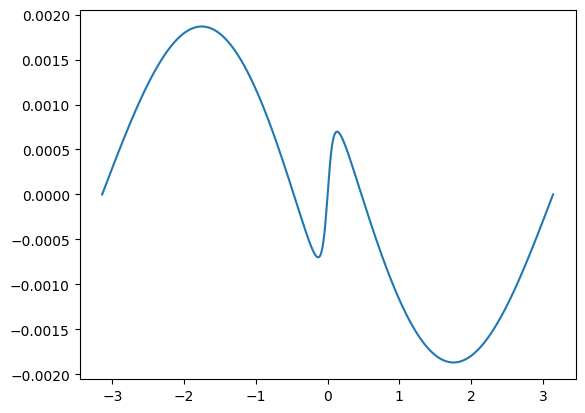

In [11]:
theta = np.linspace((-np.pi),np.pi,1000)
tauth = tau(theta)
plt.plot(theta, tauth)
plt.show()

#### 2. Approximation of Steady States

Assume that $\tau_{app} = 0$.

We want to approximate all steady states of the system. We can do this by finding all the roots of the equation $\tau(\theta) = 0$.

To do this, we will use the secant method to approximate the roots of $\tau(\theta)$.

In [14]:
def secant(f,a,b,N):
    an = a
    bn = b
    sn = an - f(an)*(bn-an)/(f(bn) - f(an))
    for n in range(N):
        if f(an)*f(sn) < 0:
            bn = sn
            sn = an - f(an)*(bn-an)/(f(bn) - f(an))
        elif f(sn)*f(bn) < 0:
            an = sn
            sn = an - f(an)*(bn-an)/(f(bn) - f(an))
        elif f(sn) == 0:
            return sn
    return sn

print(secant(tau,-1,1,2000))
print(secant(tau,-2,-0.1,2000))
print(secant(tau,0.5,1,2000))
print(secant(tau,-4,-3,2000))
print(secant(tau,3,4,2000))

0.0
-0.4714534680987935
0.4714534680987935
-3.141592653589793
3.141592653589793


Over the interval $\theta \in (-\pi, \pi)$, we can see from the plot above that the graph of $\tau(\theta)$ crosses the x-axis 5 times. Therfore, we expect to find 5 steady states of the system.

This is exactly what we see printed by the cell above.

#### 3. Approximating a Solution using Euler's Method

For this step, we will again assume that $\tau_{app} = 0$

We want to approximate a solution, $\theta(t)$, with initial conditions:

$$\theta(0) = 0.001$$
$$\theta'(0)=0$$

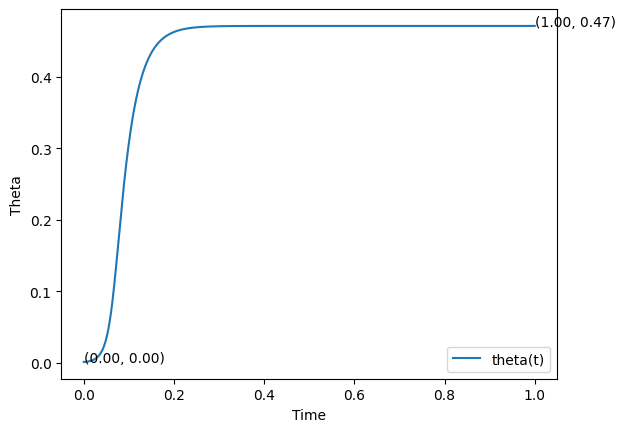

In [26]:
N = 1000
tf = 1
h = tf/N


t = np.linspace(0,tf,N) # time
y = np.zeros(len(t)) # theta

y[0] = 0.001 # Initial value theta(0)

dy = np.zeros(len(t)) # theta prime

dy[0] = 0 # Initial value y'(0)

f = lambda t,y,dy: (-mu*dy + tau(y))/I

for n in range(len(t)-1):
    y[n+1] = y[n] + dy[n]*(t[n+1] - t[n])
    dy[n+1] = dy[n] + f(t[n],y[n],dy[n])*(t[n+1] - t[n])
    
plt.plot(t,y, label="theta(t)")

# add label for first and last dta points
plt.text(t[0],y[0], f"({t[0]:.2f}, {y[0]:.2f})")
plt.text(t[-1],y[-1], f"({t[-1]:.2f}, {y[-1]:.2f})")

# axis labels
plt.xlabel("Time")
plt.ylabel("Theta")

plt.legend()
plt.show()

We can see that for the given initial conditions, the system tends towards a steady state at $\theta=0.47$

#### 4. Another Solution Approximation using Euler's Method

For this step we will assume that $\tau_{app} = 0$.

We will use a steady state, from the 5 found in step 2, as the initial condition. 

We will choose $$\theta(0)=0.47$$.

The second initial condition is still $$\theta'(0)=0$$

We will also be using a different value for $\mu$



#### $\mu = 10^{-5}$

We can some oscillation in the plot before $\theta$ finally settles back to the to a steady state of $\theta = 0.47$

0.4714532452259747


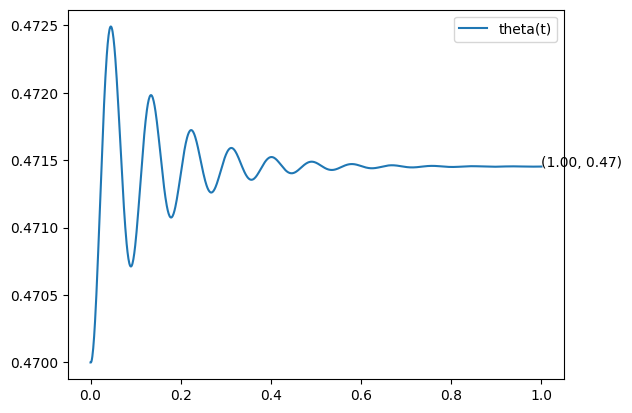

In [46]:
mu = 10**(-5)

t0 = 0
tf = 1
N = 1000

t = np.linspace(0,tf,N)
y = np.zeros(len(t))

y[0] =  0.47 # initial value y(0)
dy = np.zeros(len(t))
dy[0] = 0 # Initial value y'(0)

f = lambda t,y,dy: (-mu*dy + tau(y))/I # function for y'' = f(t,y,y')

for n in range(len(t)-1):
    y[n+1] = y[n] + dy[n]*(t[n+1] - t[n])
    dy[n+1] = dy[n] + f(t[n],y[n],dy[n])*(t[n+1] - t[n])
print(y[-1])

plt.plot(t,y,label = "theta(t)")

# label last point
plt.text(t[-1],y[-1], f"({t[-1]:.2f}, {y[-1]:.2f})")
plt.legend()
plt.show()

#### $\mu = 10^{-3}$

With a $\mu$ that is orders of magnitude larger, we can see the system is much more damped. $\theta$ settles to a steady state with no visible oscillation.

0.4713331833317107


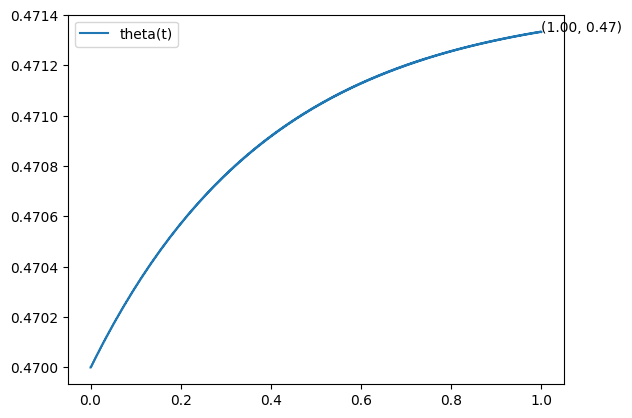

In [47]:
mu = 10**(-3)

t0 = 0
tf = 1
N = 1000

t = np.linspace(0,tf,N)
y = np.zeros(len(t))

y[0] =  0.47 # initial value y(0)
dy = np.zeros(len(t))
dy[0] = 0 # Initial value y'(0)

f = lambda t,y,dy: (-mu*dy + tau(y))/I # function for y'' = f(t,y,y')

for n in range(len(t)-1):
    y[n+1] = y[n] + dy[n]*(t[n+1] - t[n])
    dy[n+1] = dy[n] + f(t[n],y[n],dy[n])*(t[n+1] - t[n])
print(y[-1])

plt.plot(t,y,label = "theta(t)")

# label last point
plt.text(t[-1],y[-1], f"({t[-1]:.2f}, {y[-1]:.2f})")
plt.legend()
plt.show()

#### $\mu = 10^{-9}$

With a $\mu$ that is orders of magnitude smaller, we can see the system is practically undamped. $\theta$ oscillates for a long time before finally settling to a steady state.

0.4705648101158731


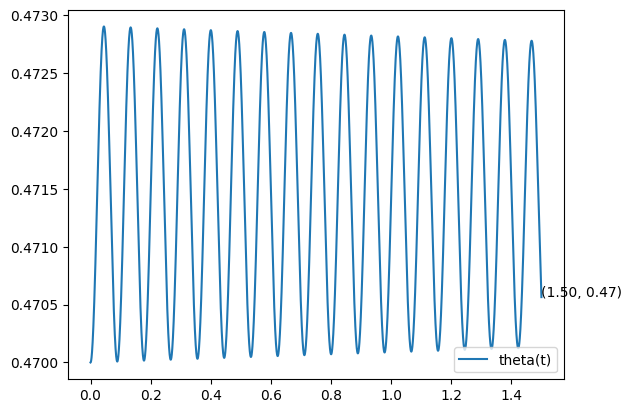

In [58]:
mu = 10**(-7)

t0 = 0
tf = 1.5
N = 100000

t = np.linspace(0,tf,N)
y = np.zeros(len(t))

y[0] =  0.47 # initial value y(0)
dy = np.zeros(len(t))
dy[0] = 0 # Initial value y'(0)

f = lambda t,y,dy: (-mu*dy + tau(y))/I # function for y'' = f(t,y,y')

for n in range(len(t)-1):
    y[n+1] = y[n] + dy[n]*(t[n+1] - t[n])
    dy[n+1] = dy[n] + f(t[n],y[n],dy[n])*(t[n+1] - t[n])
print(y[-1])

plt.plot(t,y,label = "theta(t)")

# label last point
plt.text(t[-1],y[-1], f"({t[-1]:.2f}, {y[-1]:.2f})")
plt.legend()
plt.show()